<a href="https://colab.research.google.com/github/Alex-Hoang666/AI/blob/main/AI_W4_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

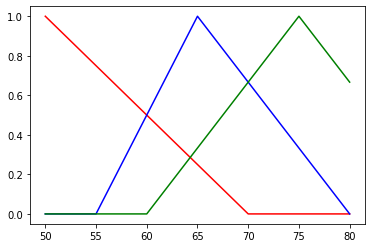

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x= np.arange(50,81,1)
slow=fuzz.trimf(x,[50,50,70])
medium=fuzz.trimf(x,[55,65,80])
fast=fuzz.trimf(x,[60,75,90])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,fast,'g',linewidth=1.5,label='fast')

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=df6c2039df899adfddb17a7870ad0bbe2690bdbfdffec923bc42d3fc8eaea8cd
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crt
food= crt.Antecedent(np.arange(0,11,1),'food')
service= crt.Antecedent(np.arange(0,11,1),'service')
tip=crt.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['medium']=fuzz.trimf(food.universe,[0,5,10])
food['high']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['medium']=fuzz.trimf(service.universe,[0,5,10])
service['high']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,12,13])
tip['medium']=fuzz.trimf(tip.universe,[10,13,24])
tip['much']=fuzz.trimf(tip.universe,[15,20,25])
food.view()
service.view()
tip.view()
rule1=crt.Rule(food['poor'] & service['poor'],tip['less'])
rule2=crt.Rule(food['poor'] & service['medium'],tip['less'])
rule3=crt.Rule(food['poor'] & service['high'],tip['medium'])
rule4=crt.Rule(food['medium']& service['poor'],tip['less'])
rule5=crt.Rule(food['medium']& service['medium'],tip['medium'])
rule6=crt.Rule(food['medium']& service['high'],tip['much'])
rule7=crt.Rule(food['high']& service['poor'],tip['less'])
rule8=crt.Rule(food['high']& service['medium'],tip['much'])
rule9=crt.Rule(food['high']& service['high'],tip['much'])
#tren deu la nhap du lieu
tipping_crt=crt.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=crt.ControlSystemSimulation(tipping_crt)
tipping.input['food']=6.5
tipping.input['service']=7
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

ValueError: ignored

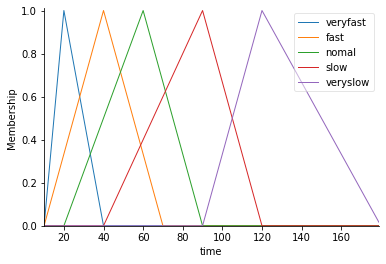

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crt
time= crt.Antecedent(np.arange(10,180,1),'time')
rice= crt.Antecedent(np.arange(100,2000,1),'rice')
power=crt.Antecedent(np.arange(0,100,1),'power')
time['veryfast']=fuzz.trimf(time.universe,[10,20,40])
time['fast']=fuzz.trimf(time.universe,[10,40,70])
time['nomal']=fuzz.trimf(time.universe,[20,60,90])
time['slow']=fuzz.trimf(time.universe,[40,90,120])
time['veryslow']=fuzz.trimf(time.universe,[90,120,180])
rice['VL']=fuzz.trimf(rice.universe,[100,200,300])
rice['L']=fuzz.trimf(rice.universe,[100,300,700])
rice['N']=fuzz.trimf(rice.universe,[600,1000,1200])
rice['M']=fuzz.trimf(rice.universe,[1000,1200,1600])
rice['VM']=fuzz.trimf(rice.universe,[1200,1800,2000])
power['low']=fuzz.trimf(power.universe,[0,0,50])
power['medium']=fuzz.trimf(power.universe,[0,50,100])
power['high']=fuzz.trimf(power.universe,[50,100,100])
time.view()
rice.view()
power.view()
rule1=crt.Rule(time['veryfast'] & rice['VL'],power['low'])
rule2=crt.Rule(time['veryfast'] & rice['L'],power['medium'])
rule3=crt.Rule(time['veryfast'] & rice['N'],power['high'])
rule4=crt.Rule(time['veryfast'] & rice['M'],power['high'])
rule5=crt.Rule(time['veryfast'] & rice['VM'],power['high'])
rule6=crt.Rule(time['fast'] & rice['VL'],power['low'])
rule7=crt.Rule(time['fast'] & rice['L'],power['medium'])
rule8=crt.Rule(time['fast'] & rice['N'],power['medium'])
rule9=crt.Rule(time['fast'] & rice['M'],power['high'])
rule10=crt.Rule(time['fast'] & rice['VM'],power['high'])
rule11=crt.Rule(time['nomal'] & rice['VL'],power['low'])
rule12=crt.Rule(time['nomal'] & rice['L'],power['medium'])
rule13=crt.Rule(time['nomal'] & rice['N'],power['medium'])
rule14=crt.Rule(time['nomal'] & rice['M'],power['medium'])
rule15=crt.Rule(time['nomal'] & rice['VM'],power['high'])
rule16=crt.Rule(time['slow'] & rice['VL'],power['low'])
rule17=crt.Rule(time['slow'] & rice['L'],power['low'])
rule18=crt.Rule(time['slow'] & rice['N'],power['low'])
rule19=crt.Rule(time['slow'] & rice['M'],power['low'])
rule20=crt.Rule(time['slow'] & rice['VM'],power['low'])
rule21=crt.Rule(time['veryslow'] & rice['VL'],power['low'])
rule22=crt.Rule(time['veryslow'] & rice['L'],power['low'])
rule23=crt.Rule(time['veryslow'] & rice['N'],power['low'])
rule24=crt.Rule(time['veryslow'] & rice['M'],power['low'])
rule25=crt.Rule(time['veryslow'] & rice['VM'],power['low'])
powering_crt=crt.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=crt.ControlSystemSimulation(powering_crt)
powering.input['time']=90
powering.input['rice']=900
powering.compute()
print(powering.output['power'])
power.view(sim=powering)